<a href="https://colab.research.google.com/github/MithunSR/Gradient_Descent_Tutorial/blob/main/Gradient_Calculation_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computing the Gradient of a Linear Regression Model

In this Colab notebook, we will explore the process of computing the gradient of a linear regression model with respect to its parameters. Specifically, we will apply gradient descent to update the parameters and fit a regression line to a real-world dataset.

The dataset we will be using is the California Housing dataset, which contains information about housing prices in various districts of California. We will focus on one of the features, namely the average number of rooms per dwelling ('AveRooms'), and use it to predict the corresponding house prices.



##Loading the Dataset:
 We will load the California Housing dataset using scikit-learn's fetch_california_housing function. This dataset contains various features related to housing and their corresponding target values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing


In [2]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data['AveRooms'].values.reshape(-1, 1)
y = california_housing.target.values.reshape(-1, 1)

##Data Preprocessing:
 We will preprocess the data by extracting the 'AveRooms' feature and standardizing its values to ensure numerical stability during the gradient calculation.

In [3]:
# Preprocess the data
X = (X - np.mean(X)) / np.std(X)

In [4]:
# Convert the data to TensorFlow tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

##Initializing Parameters:

 We will initialize the parameters of the linear regression model, including the intercept term and the coefficient for the number of rooms.

In [5]:
# Initialize the parameters
theta = tf.Variable(tf.zeros((X.shape[1], 1)), dtype=tf.float32)

##Performing Gradient Calculation:
 We will use gradient descent to compute the gradient of the cost function with respect to the parameters. This will involve iteratively updating the parameters using the gradient until convergence.

In [6]:
print(X.shape)
print(theta.shape)
print(y.shape)


(20640, 1)
(1, 1)
(20640, 1)


In [7]:
# Perform gradient calculation
num_iterations = 100
learning_rate = 0.01

optimizer = tf.optimizers.SGD(learning_rate)

for iteration in range(num_iterations):
    with tf.GradientTape() as tape:
        predictions = tf.matmul(X, theta)
        error = predictions - y
        loss = tf.reduce_mean(tf.square(error))
    
    gradients = tape.gradient(loss, theta)
    optimizer.apply_gradients(zip([gradients], [theta]))

In [8]:
# Convert the tensors back to numpy arrays
X = X.numpy()
y = y.numpy()
theta = theta.numpy()

##Plotting the Data and Regression Line: 
Finally, we will visualize the original data points and the fitted regression line to observe how well the model captures the relationship between the average number of rooms and house prices.

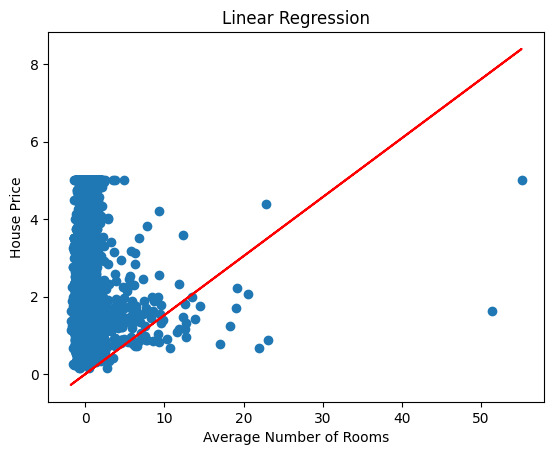

In [9]:
# Plot the original data and the regression line
plt.scatter(X, y)
plt.plot(X, X.dot(theta), color='red')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price')
plt.title('Linear Regression')
plt.show()

By going through this notebook, you will gain a better understanding of how the gradient of a linear regression model is calculated and how it can be used to fit a regression line to real-world data.